In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
x1 = np.zeros(101)
x2 = np.zeros(101)
y = np.zeros(101)

# Initial conditions
x1[0] = 1
x2[0] = 1

# Perform the iteration
for k in range(100):
    x1[k+1] = x2[k] + 1 - 1.4*x1[k]**2
    x2[k+1] = 0.3*x1[k]
    y[k] = x1[k]

In [5]:
x = np.column_stack((x1, x2))

In [31]:
x = x.reshape(-1, 1, 2)
y = y.reshape(-1, 1, 1)

print(x.shape)
print(y.shape)

RNN_input = x
RNN_output = y


(101, 1, 2)
(101, 1, 1)


In [34]:
scaler_X = preprocessing.StandardScaler().fit(RNN_input.reshape(-1, 2))
scaler_y = preprocessing.StandardScaler().fit(RNN_output.reshape(-1, 1))

RNN_input = scaler_X.transform(RNN_input.reshape(-1, 2)).reshape(-1, 1, 2)
RNN_output = scaler_y.transform(RNN_output.reshape(-1, 1)).reshape(-1, 1, 1)


print(RNN_input.shape)
print(RNN_output.shape)

X_train, X_test, y_train, y_test = train_test_split(RNN_input, RNN_output, test_size=0.3, random_state=123)



(101, 1, 2)
(101, 1, 1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 4s - 4s/step - loss: 0.8128 - val_loss: 0.6619
Epoch 2/100
1/1 - 0s - 78ms/step - loss: 0.8030 - val_loss: 0.6543
Epoch 3/100
1/1 - 0s - 96ms/step - loss: 0.7933 - val_loss: 0.6468
Epoch 4/100
1/1 - 0s - 112ms/step - loss: 0.7837 - val_loss: 0.6393
Epoch 5/100
1/1 - 0s - 101ms/step - loss: 0.7741 - val_loss: 0.6317
Epoch 6/100
1/1 - 0s - 137ms/step - loss: 0.7645 - val_loss: 0.6239
Epoch 7/100
1/1 - 0s - 139ms/step - loss: 0.7548 - val_loss: 0.6161
Epoch 8/100
1/1 - 0s - 121ms/step - loss: 0.7450 - val_loss: 0.6080
Epoch 9/100
1/1 - 0s - 147ms/step - loss: 0.7351 - val_loss: 0.5996
Epoch 10/100
1/1 - 0s - 306ms/step - loss: 0.7250 - val_loss: 0.5909
Epoch 11/100
1/1 - 0s - 308ms/step - loss: 0.7147 - val_loss: 0.5818
Epoch 12/100
1/1 - 0s - 107ms/step - loss: 0.7041 - val_loss: 0.5722
Epoch 13/100
1/1 - 0s - 120ms/step - loss: 0.6933 - val_loss: 0.5622
Epoch 14/100
1/1 - 0s - 139ms/step - loss: 0.6821 - val_loss: 0.5516
Epoch 15/100
1/1 - 0s - 140ms/step - loss: 0.6705 - val_loss

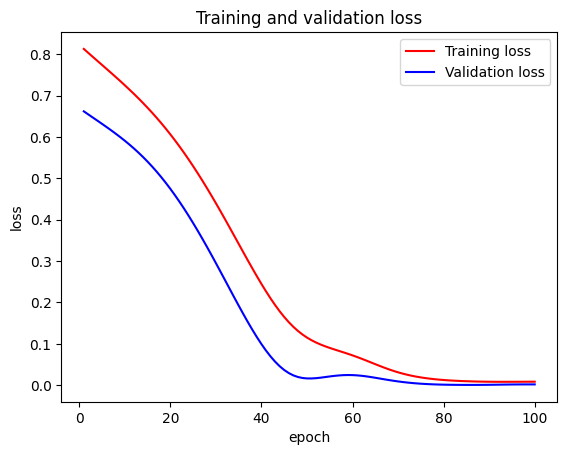

In [36]:
model = Sequential()
model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(1, 2))) #RNN 
model.add(LSTM(64, activation='tanh', return_sequences=True)) #RNN 
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.1, verbose=2)


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [37]:
print(model.evaluate(X_test,y_test))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120
0.01198193896561861
